<a href="https://colab.research.google.com/github/AkmalAmeer/MobiusStrip-Assessment/blob/main/MobiusStrip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

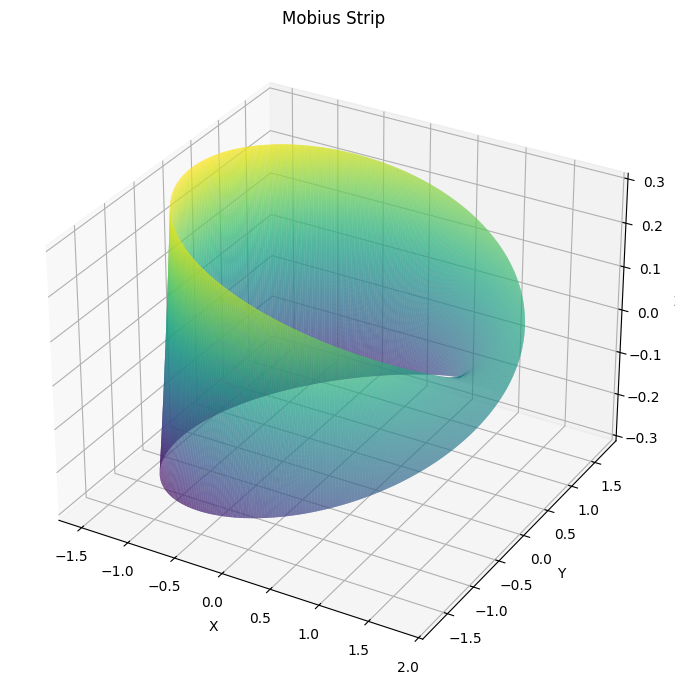

Approximated Surface Area: 5.6926
Approximated Edge Length: 18.9922


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class MobiusStrip:
    def __init__(self, R=1.0, w=0.2, n=100):
        """
          Task-1
          Initialize the Mobius strip with given parameters.

          Parameters:
          R : float - radius from center to the mid-line of the strip
          w : float - width of the strip
          n : int   - number of divisions (resolution) for mesh grid
        """
        self.R = R
        self.w = w
        self.n = n

        # Creating parameter grids for u and v
        self.u = np.linspace(0, 2 * np.pi, n)
        self.v = np.linspace(-w / 2, w / 2, n)
        self.U, self.V = np.meshgrid(self.u, self.v)

        # Generating the 3D surface points
        self.X, self.Y, self.Z = self._compute_mesh()

    def _compute_mesh(self):
        """
          Generating the X, Y, Z coordinates of the Mobius strip using parametric equations.
        """
        u = self.U
        v = self.V
        R = self.R

        # Parametric equations for the Mobius strip
        x = (R + v * np.cos(u / 2)) * np.cos(u)
        y = (R + v * np.cos(u / 2)) * np.sin(u)
        z = v * np.sin(u / 2)
        return x, y, z

    def compute_surface_area(self):
        """
          Approximating the surface area of the Mobius strip using numerical integration.
        """
        du = (2 * np.pi) / (self.n - 1)
        dv = self.w / (self.n - 1)

        # Computing derivatives with respect to u and v
        Xu = np.gradient(self.X, axis=1) / du
        Yu = np.gradient(self.Y, axis=1) / du
        Zu = np.gradient(self.Z, axis=1) / du

        Xv = np.gradient(self.X, axis=0) / dv
        Yv = np.gradient(self.Y, axis=0) / dv
        Zv = np.gradient(self.Z, axis=0) / dv

        cross_prod_mag = np.sqrt(
            (Yu * Zv - Zu * Yv) ** 2 +
            (Zu * Xv - Xu * Zv) ** 2 +
            (Xu * Yv - Yu * Xv) ** 2
        )

        area = np.sum(cross_prod_mag) * du * dv
        return area

    def compute_edge_length(self):
        """
          Task-2
          Computing the total edge length by calculating the arc length along the boundary curves.
        """
        u = self.u
        v = self.w / 2
        x_edge = (self.R + v * np.cos(u / 2)) * np.cos(u)
        y_edge = (self.R + v * np.cos(u / 2)) * np.sin(u)
        z_edge = v * np.sin(u / 2)

        # Computing the differences between consecutive points
        dx = np.gradient(x_edge)
        dy = np.gradient(y_edge)
        dz = np.gradient(z_edge)

        # Calculating the arc length using Euclidean distance formula
        length = np.sum(np.sqrt(dx**2 + dy**2 + dz**2))
        return 2 * length

    def plot(self):
        """
          Ploting the Mobius strip using matplotlib's 3D surface plot.
        """
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')

        # Creating the surface plot with color mapping
        ax.plot_surface(self.X, self.Y, self.Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
        ax.set_title("Mobius Strip")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
  # Creating a Mobius strip object with sample parameters
  mobius = MobiusStrip(R=1.5, w=0.6, n=400)
  area = mobius.compute_surface_area()
  edge_length = mobius.compute_edge_length()
  mobius.plot()

  (area, edge_length)

  # Output
  print(f"Approximated Surface Area: {area:.4f}")
  print(f"Approximated Edge Length: {edge_length:.4f}")

